In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
# 读取数据
populationData = np.load('./dataset/populations.npz',allow_pickle=True)
print(populationData.files) # 获取数组下标
npData = populationData['data']
npHeader = populationData['feature_names']
npData = np.vstack((npHeader,npData))
# 去除最后两行
npData = npData[0:len(npData)-2]
npData
pd.DataFrame
data = pd.DataFrame(npData[1:][::-1],columns=npData[0])
data

['data', 'feature_names']


,时间,年末总人口(万人),男性人口(万人),女性人口(万人),城镇人口(万人),乡村人口(万人)
0,1996年,122389.0,62200.0,60189.0,37304.0,85085.0
1,1997年,123626.0,63131.0,60495.0,39449.0,84177.0
2,1998年,124761.0,63940.0,60821.0,41608.0,83153.0
3,1999年,125786.0,64692.0,61094.0,43748.0,82038.0
4,2000年,126743.0,65437.0,61306.0,45906.0,80837.0
5,2001年,127627.0,65672.0,61955.0,48064.0,79563.0
6,2002年,128453.0,66115.0,62338.0,50212.0,78241.0
7,2003年,129227.0,66556.0,62671.0,52376.0,76851.0
8,2004年,129988.0,66976.0,63012.0,54283.0,75705.0
9,2005年,130756.0,67375.0,63381.0,56212.0,74544.0


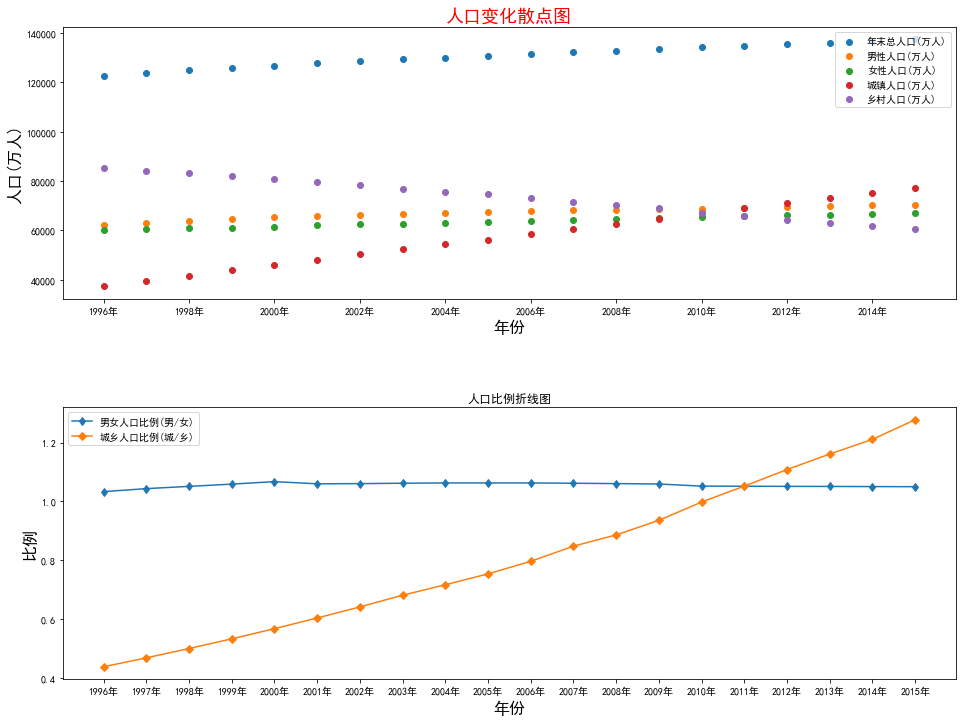

In [16]:
# 创建画布
fig = plt.figure(figsize=(16,12))
# 设置子图与子图之间的间隔
plt.subplots_adjust(hspace=0.4, wspace=0.4)
# 第一个子图
fig.add_subplot(211)
# 设置标题
plt.title("人口变化散点图",loc='center',fontsize='18',color='r')
# 设置y标题
plt.ylabel("人口(万人)",fontsize=16)
plt.xlabel("年份",fontsize=16)
# x轴
xAxis = data.iloc[:,0]
scaterData = data.iloc[:,1:data.shape[1]]
# 遍历列，返回元组 0：列名 1：数据
for item in scaterData.iteritems():
    plt.scatter(xAxis,item[1],label=item[0])

xArr = xAxis[xAxis.index%2 == 0]
# print(xArr)
plt.xticks(xArr)
# 绘制图例
plt.legend()

# 绘制第二个子图
fig.add_subplot(212)
plt.title("人口比例折线图")
plt.ylabel("比例",fontsize=16)
plt.xlabel("年份",fontsize=16)
plt.plot(xAxis,data["男性人口(万人)"] / data["女性人口(万人)"],marker='d',label="男女人口比例(男/女)")
plt.plot(xAxis,data["城镇人口(万人)"] / data["乡村人口(万人)"],marker='D',label="城乡人口比例(城/乡)")
plt.legend()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


(-1.111772087378838,
 1.1569724167558475,
 -1.1232270394596506,
 1.1988652846754084)

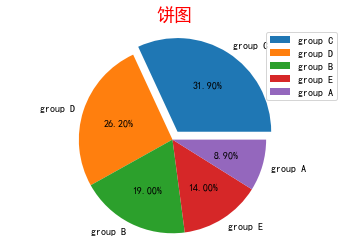

In [ ]:

stuData = pd.read_csv('./dataset/StudentsPerformance.csv',sep=',')
# 统计每个种类的数量
countSeries = stuData["race/ethnicity"].value_counts() # series
print(countSeries)
explode = [0.1,0,0,0,0]
piePlot = plt.pie(countSeries.values,labels=countSeries.index,explode=explode,autopct='%.2f%%')
plt.legend(countSeries.index,loc='best')
plt.title("饼图",loc='center',fontsize='18',color='r')
plt.axis('equal')

(array([1, 2, 3]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

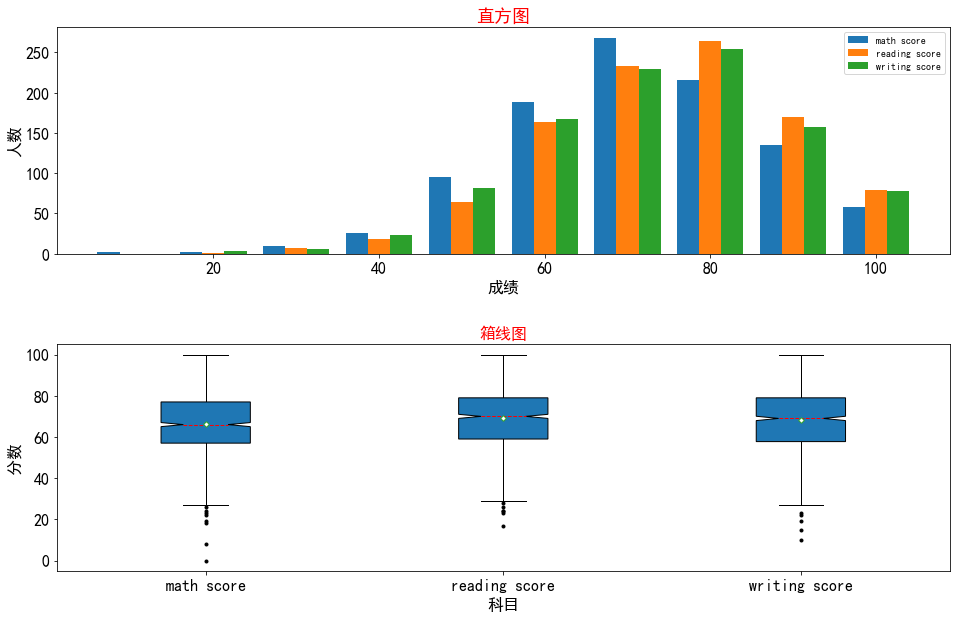

In [ ]:
mathScore = stuData["math score"].values
readingScore = stuData["reading score"].values
writingScore = stuData["writing score"].values
labels = ["math score","reading score","writing score"]
# 多类型直方图数据
histData = [mathScore,readingScore,writingScore]
# print(histData)
fig = plt.figure(figsize=(16,10))
# 设置子图与子图之间的间隔
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.add_subplot(211)
plt.hist(histData,rwidth=0.8,align="right",label=labels)
plt.ylabel("人数",fontsize=16)
plt.xlabel('成绩',fontsize='16')
plt.title("直方图",loc='center',fontsize='18',color='r')
plt.legend()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# 箱线图
# plt.boxplot?
fig.add_subplot(212)
boxPlot = plt.boxplot(
    x=histData,
    labels=labels,
    notch=True,
    patch_artist = True, 
    showmeans = True, # 以点的形式显示均值
    # 设置异常点属性，如点的形状、填充色和点的大小
    flierprops = {'marker':'o','markerfacecolor':'black', 'markersize':3}, 
    # 设置均值点的属性，如点的形状、填充色和点的大小
    meanprops = {'marker':'D','markerfacecolor':'white', 'markersize':4}, 
    # 设置中位数线的属性，如线的类型和颜色
    medianprops = {'linestyle':'--','color':'red','linewidth': 1}, 
    )
plt.title("箱线图",color="r",fontsize=16)
plt.xlabel('科目',fontsize=16)
plt.ylabel('分数',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# stuData